# Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imghdr

In [2]:
os.path.join("data", "happy")

'data\\happy'

In [3]:
os.listdir("data")

['happy', 'sad']

# Remove dodgy images

In [4]:
data_dir = "data"

In [5]:
os.listdir(os.path.join(data_dir, "happy"))

['05-12-21-happy-people.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902544.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd22d3f013.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'ce529eea8c0ca9987656fa90474563d6.jpg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'GettyImages-1152307607_525151_wrcmhy.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_

In [6]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
                print("Issue with image {}".format(image_path))
                # os.remove(image_path)

# Load Data

In [10]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 171 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
# Images represented as numpy arrays
batch[0].max()

255.0

In [14]:
batch[1]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

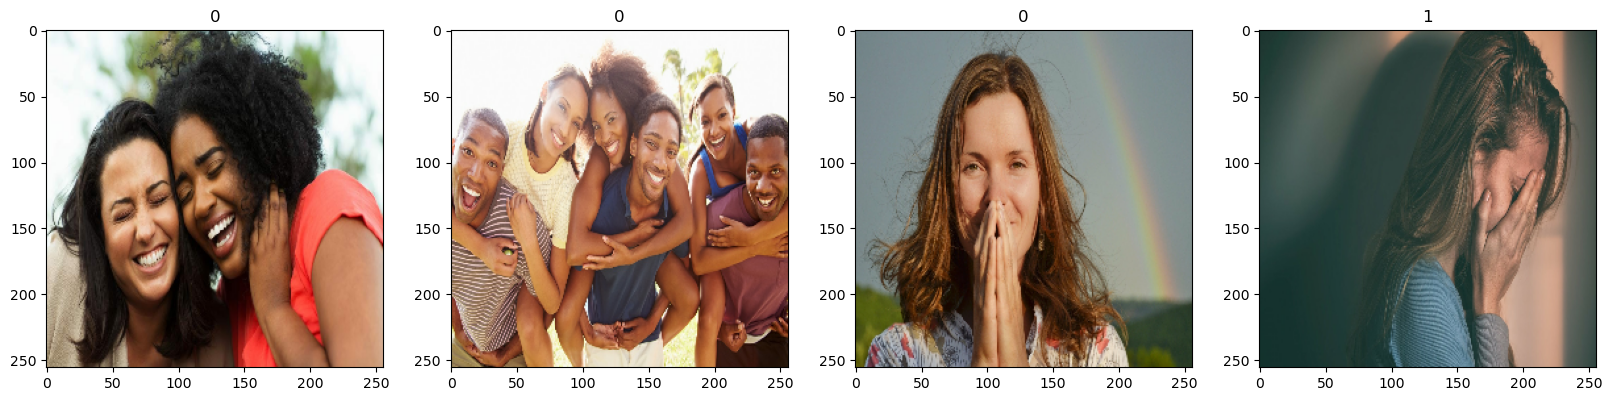

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0] / 255

In [17]:
scaled.max()

1.0

# Preprocess Data

# Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [19]:
data.as_numpy_iterator().next()

(array([[[[0.07352941, 0.07352941, 0.06568628],
          [0.08128829, 0.08128829, 0.07344516],
          [0.08628983, 0.08628983, 0.07844669],
          ...,
          [0.09719669, 0.14033395, 0.07758885],
          [0.11902574, 0.16608456, 0.08765319],
          [0.11323529, 0.16813725, 0.07794118]],
 
         [[0.06417739, 0.06417739, 0.05633425],
          [0.06707261, 0.06707261, 0.05922947],
          [0.0589231 , 0.0589231 , 0.05107996],
          ...,
          [0.11870404, 0.1618413 , 0.0990962 ],
          [0.09245557, 0.1395144 , 0.06108303],
          [0.16246936, 0.21737133, 0.11541054]],
 
         [[0.07305454, 0.07305454, 0.0652114 ],
          [0.08855698, 0.08855698, 0.08071385],
          [0.07642464, 0.07642464, 0.06858149],
          ...,
          [0.08632813, 0.12946539, 0.06672028],
          [0.09489124, 0.13018535, 0.04783241],
          [0.17637868, 0.20775123, 0.11632966]],
 
         ...,
 
         [[0.23471966, 0.22295496, 0.19550398],
          [0.24699

# Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+ 1
test_size = int(len(data)*.1) + 1

In [21]:
test_size + val_size + train_size

7

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
len(val)

2

# Deep Model

# Build Deep Learning Model

In [24]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=200, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/200
4/4 [==============================] - 10s 2s/step - loss: 1.2712 - accuracy: 0.4922 - val_loss: 0.8300 - val_accuracy: 0.3953
Epoch 2/200
4/4 [==============================] - 9s 2s/step - loss: 0.7122 - accuracy: 0.5391 - val_loss: 0.6035 - val_accuracy: 0.6744
Epoch 3/200
4/4 [==============================] - 9s 2s/step - loss: 0.6072 - accuracy: 0.6172 - val_loss: 0.7522 - val_accuracy: 0.4419
Epoch 4/200
4/4 [==============================] - 9s 2s/step - loss: 0.6138 - accuracy: 0.6328 - val_loss: 0.5747 - val_accuracy: 0.7209
Epoch 5/200
4/4 [==============================] - 10s 2s/step - loss: 0.5659 - accuracy: 0.7109 - val_loss: 0.5554 - val_accuracy: 0.6512
Epoch 6/200
4/4 [==============================] - 9s 2s/step - loss: 0.5143 - accuracy: 0.7344 - val_loss: 0.4981 - val_accuracy: 0.6744
Epoch 7/200
4/4 [==============================] - 8s 2s/step - loss: 0.4427 - accuracy: 0.7812 - val_loss: 0.4122 - val_accuracy: 0.9070
Epoch 8/200
4/4 [===============

Epoch 114/200
4/4 [==============================] - 9s 2s/step - loss: 2.6386e-05 - accuracy: 1.0000 - val_loss: 1.4314e-05 - val_accuracy: 1.0000
Epoch 115/200
4/4 [==============================] - 9s 2s/step - loss: 2.6075e-05 - accuracy: 1.0000 - val_loss: 1.5472e-05 - val_accuracy: 1.0000
Epoch 116/200
4/4 [==============================] - 10s 2s/step - loss: 2.3551e-05 - accuracy: 1.0000 - val_loss: 2.2494e-05 - val_accuracy: 1.0000
Epoch 117/200
4/4 [==============================] - 9s 2s/step - loss: 2.2995e-05 - accuracy: 1.0000 - val_loss: 2.8431e-05 - val_accuracy: 1.0000
Epoch 118/200
4/4 [==============================] - 9s 2s/step - loss: 2.2269e-05 - accuracy: 1.0000 - val_loss: 2.1271e-05 - val_accuracy: 1.0000
Epoch 119/200
4/4 [==============================] - 9s 2s/step - loss: 2.2353e-05 - accuracy: 1.0000 - val_loss: 2.9834e-05 - val_accuracy: 1.0000
Epoch 120/200
4/4 [==============================] - 9s 2s/step - loss: 2.1590e-05 - accuracy: 1.0000 - val_los

In [30]:
hist.history

{'loss': [1.2711952924728394,
  0.7121673822402954,
  0.6071548461914062,
  0.6137678623199463,
  0.5658568143844604,
  0.5142757296562195,
  0.44270059466362,
  0.4202238917350769,
  0.350640207529068,
  0.26204192638397217,
  0.2779512405395508,
  0.23369373381137848,
  0.17947670817375183,
  0.12699119746685028,
  0.0973665863275528,
  0.07969324290752411,
  0.06382415443658829,
  0.03366345167160034,
  0.02539178915321827,
  0.017040962353348732,
  0.014201427809894085,
  0.006491459906101227,
  0.003567678853869438,
  0.009668605402112007,
  0.007164538372308016,
  0.004195241257548332,
  0.0030654752627015114,
  0.0012806582963094115,
  0.0014822956873103976,
  0.0009031620575115085,
  0.0007677038665860891,
  0.0008017578511498868,
  0.0006976623553782701,
  0.0004138138610869646,
  0.0004425913211889565,
  0.0004892998840659857,
  0.00033678050385788083,
  0.0003229737048968673,
  0.00030628929380327463,
  0.00024381814000662416,
  0.00030760711524635553,
  0.000275330326985567

# Plot Performance

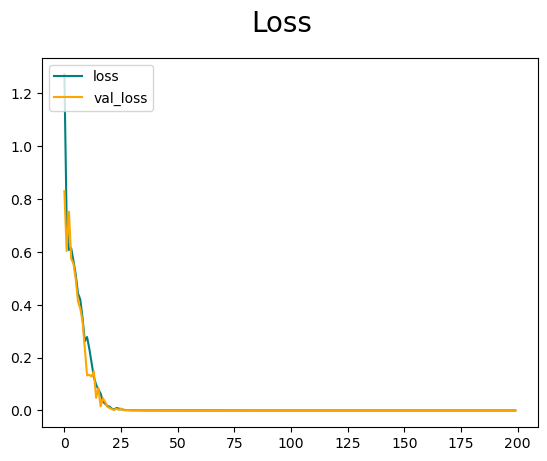

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

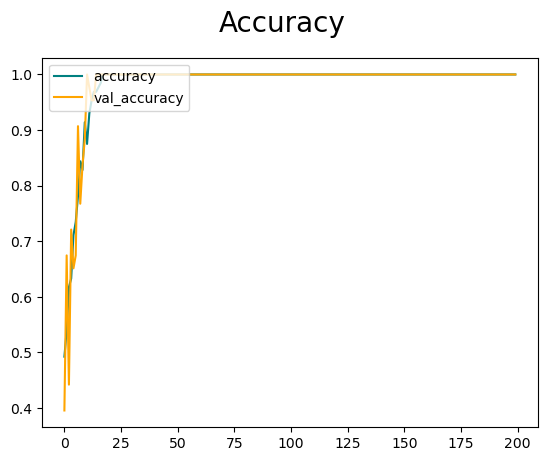

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Test

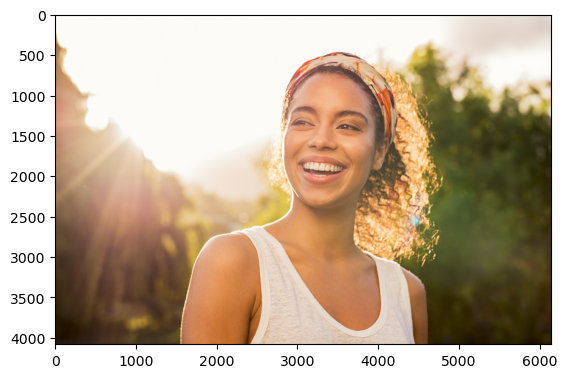

In [36]:
img = cv2.imread("happy_test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

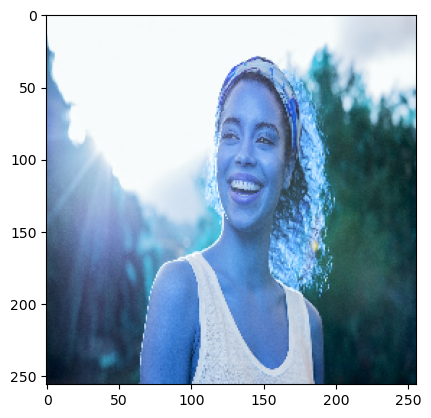

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 222ms/step


In [39]:
yhat

array([[0.5357588]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [93]:
resize.shape

TensorShape([256, 256, 3])

# Save Model

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model.save(os.path.join('Model','imageclassifier.h5'))

In [113]:
new_model = load_model(os.path.join("Model","imageclassifier.h5"))

In [114]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 241ms/step


array([[0.7275936]], dtype=float32)